In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'movies.csv')


In [2]:
# Now let's take a look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Cleaning up the data

Budget and Gross both have null values.

Column Budget has 2171 null values, gross 189


In [5]:
# Cleaning the Budget Column by adding the mean() to the blank Values

mean_b = df["budget"].mean()
print(mean_b)
df["budget"].fillna(mean_b, inplace = True)

35589876.192650534


In [6]:
# Checking if the Budget Column is now populated (No blank Values)

df.isnull().sum()

name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       4
dtype: int64

In [7]:
# Cleaning the Budget Column by adding the mean() to the blank Values
mean_g = df["gross"].mean()
print(mean_g)
df["gross"].fillna(mean_b, inplace = True)
df.isnull().sum()

78500541.01778312


name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [8]:
# Replacing the blank Score, votes values with the mean

mean_sc = df["score"].mean()
mean_v = df["votes"].mean()
print(mean_sc, mean_v)
df["score"].fillna(mean_sc, inplace = True)
df["votes"].fillna(mean_v, inplace = True)
df.isnull().sum()

6.390410958904109 88108.50476190477


name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

## Replacing the blank values of the company column with "Unknown Company"


In [9]:
# Data Types for our columns
#df["company"].unique()

df["company"].fillna("Unknown Company", inplace = True)
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company      0
runtime      4
dtype: int64

In [10]:
df["rating"].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [11]:
df["rating"].fillna("Not Rated", inplace = True)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    2
score       0
votes       0
director    0
writer      3
star        1
country     3
budget      0
gross       0
company     0
runtime     4
dtype: int64

In [12]:
df['released'].unique()

array(['June 13, 1980 (United States)', 'July 2, 1980 (United States)',
       'June 20, 1980 (United States)', ...,
       'October 23, 2020 (United States)', 'April 27, 2020 (Cameroon)',
       'August 19, 2020 (United States)'], dtype=object)

In [13]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [14]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [15]:
## Dropping comumns Writer, runtime and released

df.drop(["runtime", "released"], axis = 1, inplace = True)

In [16]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      3
star        1
country     3
budget      0
gross       0
company     0
dtype: int64

## Replacing the missing Country Names with value "Unknown Country"

In [17]:
df["country"].fillna("Unknown Country", inplace = True)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      3
star        1
country     0
budget      0
gross       0
company     0
dtype: int64

In [18]:
df["star"].unique()

df["star"].fillna("Unknown Star", inplace = True)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      3
star        0
country     0
budget      0
gross       0
company     0
dtype: int64

In [19]:
df["writer"].unique()

df["writer"].fillna("Unknown Writer", inplace = True)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
dtype: int64

In [20]:
df["votes"] = df["votes"].astype("int64")
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0    8.4   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  
0  United Kingdom  19000000   46998772        Warner Bros.  
1   United States   4500000   58853106   Columbia Pictures  
2   United States  18000000  538375067           Lucasfilm  
3   United States   3500000   83453539  Paramount Pictures  
4   United States   6000000   39846344      Orion Pictures

In [21]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
dtype: object


In [22]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
dtype: int64

In [23]:
df.dtypes

name         object
rating       object
genre        object
year          int64
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
dtype: object

## Sorting the Dataset by "Gross"

In [48]:
df.sort_values(by=['gross'], inplace = False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
3818                        Love, Honor and Obey          R  Comedy  2000   
7625                            The Untold Story  Not Rated  Comedy  2019   
7580                         Run with the Hunted  Not Rated   Crime  2019   
2417                                    Madadayo  Not Rated   Drama  1993   
3203                                  Trojan War      PG-13  Comedy  1997   

      score    votes         director              writer               star  \
5445    7.8  1100000    James Cameron       James Cameron    Sam Worthington   
7445    8.4   903000    Anthony Russo  Christopher Markus  Robert Downey Jr.   
3045    7.8  1100000    James Cameron       James Cameron  Leonardo DiCaprio   
6663    7.8   876000      J.J. Abrams     Lawrence Kasdan       Daisy Ridley   
7244    8.4   897000    Anthony Russo  Christopher Markus  Robert Downey Jr.   
...     ...      ...              ...                 ...                ...   
3818    6.5     5200  Dominic Anciano     Dominic Anciano        Sadie Frost   
7625    5.7      320    Shane Stanley         Lee Stanley        Miko Hughes   
7580    5.2      735        John Swab           John Swab        Ron Perlman   
2417    7.3     5100   Akira Kurosawa        Ishirô Honda   Tatsuo Matsumura   
3203    5.7     5800     George Huang           Andy Burg       Will Friedle   

             country     budget       gross  \
5445   United States  237000000  2847246203   
7445   United States  356000000  2797501328   
3045   United States  200000000  2201647264   
6663   United States  245000000  2069521700   
7244   United States  321000000  2048359754   
...              ...        ...         ...   
3818  United Kingdom   35589876        1400   
7625   United States   35589876         790   
7580   United States   35589876         682   
2417           Japan   11900000         596   
3203   United States   15000000         309   

                                     company  
5445                   Twentieth Century Fox  
7445                          Marvel Studios  
3045                   Twentieth Century Fox  
6663                               Lucasfilm  
7244                          Marvel Studios  
...                                      ...  
3818  British Broadcasting Corporation (BBC)  
7625               Visual Arts Entertainment  
7580                           Roxwell Films  
2417          DENTSU Music And Entertainment  
3203                                Daybreak  

[7668 rows x 13 columns]

## Setting Options to view all the Data

In [24]:
pd.set_option('display.max_row', None)
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0    8.4   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  
0  United Kingdom  19000000   46998772        Warner Bros.  
1   United States   4500000   58853106   Columbia Pictures  
2   United States  18000000  538375067           Lucasfilm  
3   United States   3500000   83453539  Paramount Pictures  
4   United States   6000000   39846344      Orion Pictures

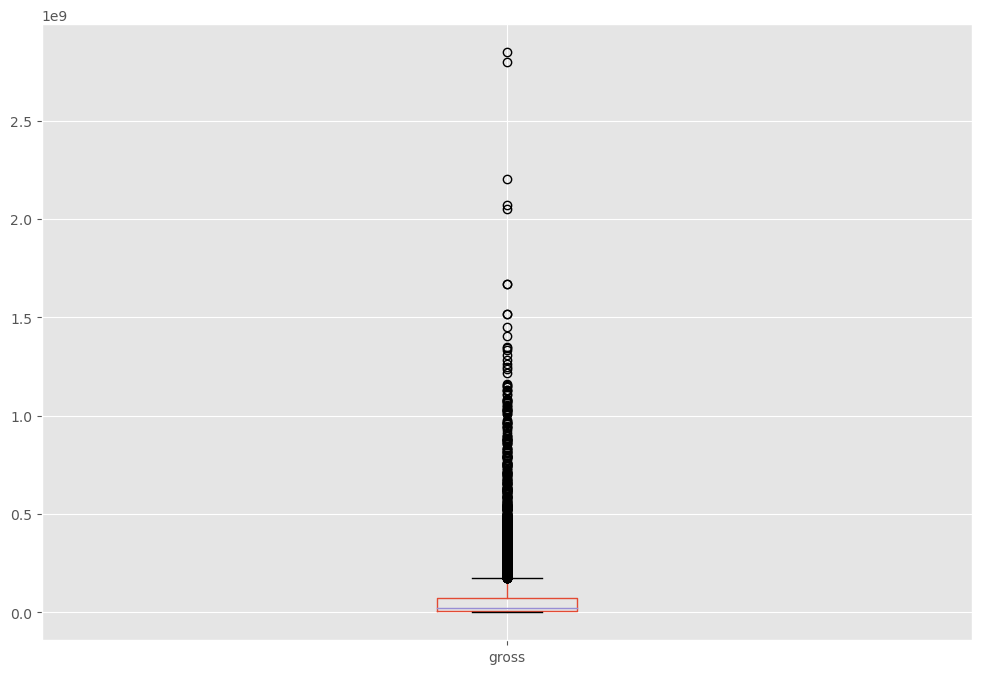

In [46]:
# Are there any Outliers?

df.boxplot(column=['gross']);

In [25]:
df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                                 Fame          R      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
19                                           Stir Crazy          R     Comedy   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
27                                    Raise the Titanic         PG     Action   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
33                     Cattle Annie and Little Britches         PG      Drama   
34                                 Seems Like Old Times         PG     Comedy   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
42                                        The Stunt Man          R     Action   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
46                                           The Island          R     Action   
47                                       The Boogey Man          R     Horror   
48                                        The Nude Bomb         PG     Action   
4

In [26]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0    8.4   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  
0  United Kingdom  19000000   46998772        Warner Bros.  
1   United States   4500000   58853106   Columbia Pictures  
2   United States  18000000  538375067           Lucasfilm  
3   United States   3500000   83453539  Paramount Pictures  
4   United States   6000000   39846344      Orion Pictures

## Hypothesis 1: I believe that ther is a high probability that gross earnings and budget are related linearly.

### To check this Will plot Gross Earnings against Budget

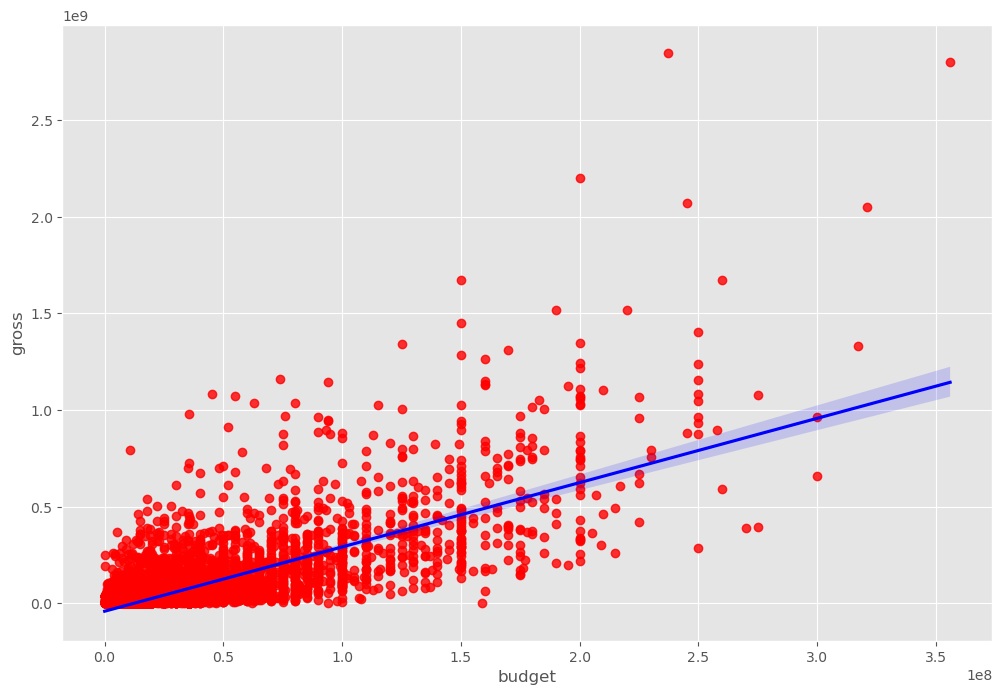

In [27]:
sns.regplot(y = "gross", x = "budget", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"});

## Doing a Scatterplot with Gross and Budget

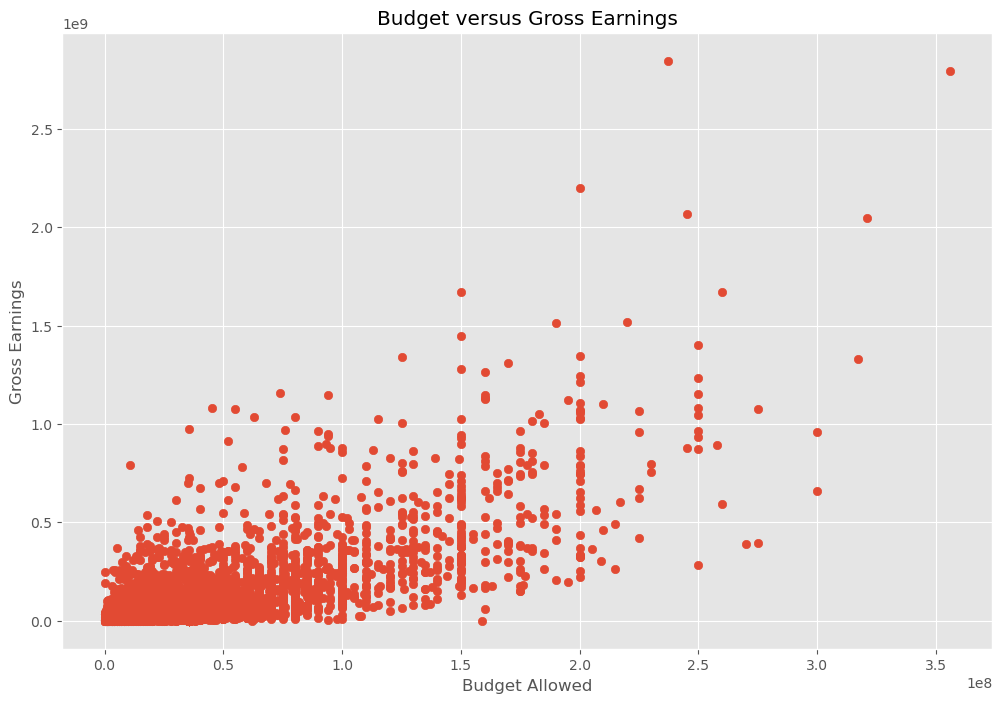

In [31]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget versus Gross Earnings')
plt.xlabel('Budget Allowed')
plt.ylabel('Gross Earnings')
plt.show();

## Determining the correlations.

In [32]:
df.corr(numeric_only=True, method='pearson') # Other methods include kendall and spearman

year     score     votes    budget     gross
year    1.000000  0.097936  0.222810  0.265578  0.257613
score   0.097936  1.000000  0.409182  0.064541  0.184919
votes   0.222810  0.409182  1.000000  0.421007  0.631385
budget  0.265578  0.064541  0.421007  1.000000  0.712529
gross   0.257613  0.184919  0.631385  0.712529  1.000000

##  Seems that there is a high Correlation between Budget and Gross Earnings and a reasonably high correlation between votes and gross

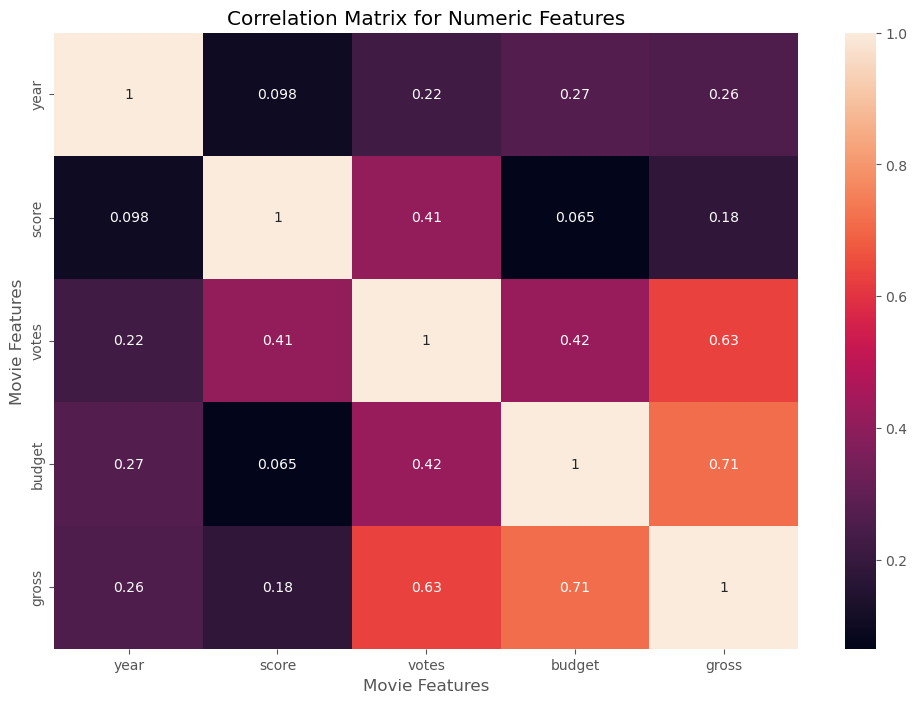

In [33]:
Correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(Correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show();

In [34]:
df.dtypes

name         object
rating       object
genre        object
year          int64
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
dtype: object

## In order to determine correlations with other fields eg Company and Budget, we need to numerize all other object type fields

In [36]:
df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  score    votes  director  writer  star  country  \
0  6587       6      6  1980    8.4   927000      2589    4014  1047       54   
1  5573       6      1  1980    5.8    65000      2269    1632   327       55   
2  5142       4      0  1980    8.7  1200000      1111    2567  1745       55   
3   286       4      4  1980    7.7   221000      1301    2000  2246       55   
4  1027       6      4  1980    7.3   108000      1054     521   410       55   

     budget      gross  company  
0  19000000   46998772     2320  
1   4500000   58853106      731  
2  18000000  538375067     1540  
3   3500000   83453539     1812  
4   6000000   39846344     1777

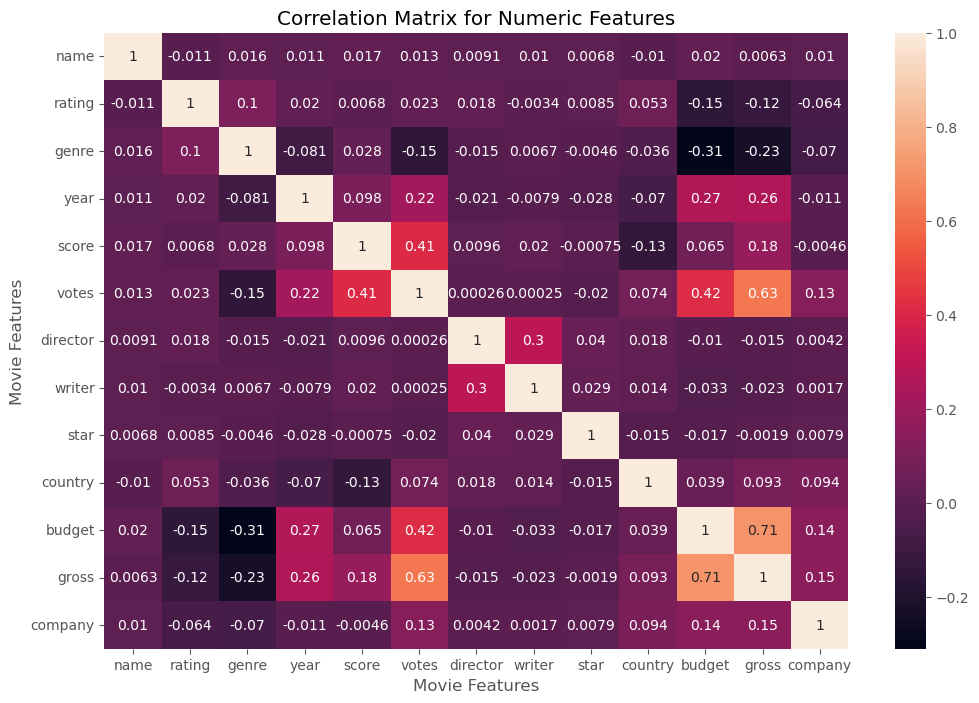

In [37]:
Correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(Correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show();

In [38]:
df_numerized.corr()

name    rating     genre      year     score     votes  \
name      1.000000 -0.010860  0.016355  0.011453  0.017095  0.013086   
rating   -0.010860  1.000000  0.104108  0.019913  0.006825  0.022813   
genre     0.016355  0.104108  1.000000 -0.081261  0.027959 -0.145276   
year      0.011453  0.019913 -0.081261  1.000000  0.097936  0.222810   
score     0.017095  0.006825  0.027959  0.097936  1.000000  0.409182   
votes     0.013086  0.022813 -0.145276  0.222810  0.409182  1.000000   
director  0.009079  0.018466 -0.015258 -0.020795  0.009559  0.000260   
writer    0.009985 -0.003401  0.006747 -0.007930  0.019787  0.000252   
star      0.006844  0.008469 -0.004641 -0.027912 -0.000754 -0.019510   
country  -0.010359  0.053247 -0.035783 -0.069590 -0.134447  0.073521   
budget    0.020368 -0.148372 -0.310566  0.265578  0.064541  0.421007   
gross     0.006304 -0.120509 -0.232632  0.257613  0.184919  0.631385   
company   0.010373 -0.064254 -0.070032 -0.011425 -0.004584  0.130659   

          director    writer      star   country    budget     gross   company  
name      0.009079  0.009985  0.006844 -0.010359  0.020368  0.006304  0.010373  
rating    0.018466 -0.003401  0.008469  0.053247 -0.148372 -0.120509 -0.064254  
genre    -0.015258  0.006747 -0.004641 -0.035783 -0.310566 -0.232632 -0.070032  
year     -0.020795 -0.007930 -0.027912 -0.069590  0.265578  0.257613 -0.011425  
score     0.009559  0.019787 -0.000754 -0.134447  0.064541  0.184919 -0.004584  
votes     0.000260  0.000252 -0.019510  0.073521  0.421007  0.631385  0.130659  
director  1.000000  0.299523  0.039875  0.018014 -0.010364 -0.014635  0.004248  
writer    0.299523  1.000000  0.028887  0.014490 -0.033223 -0.023082  0.001729  
star      0.039875  0.028887  1.000000 -0.015101 -0.017056 -0.001940  0.007918  
country   0.018014  0.014490 -0.015101  1.000000  0.038576  0.092582  0.094176  
budget   -0.010364 -0.033223 -0.017056  0.038576  1.000000  0.712529  0.142856  
gross    -0.014635 -0.023082 -0.001940  0.092582  0.712529  1.000000  0.152866  
company   0.004248  0.001729  0.007918  0.094176  0.142856  0.152866  1.000000

In [39]:
correlation_mat = df_numerized.corr()
corr_pairs =correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.010860
          genre       0.016355
          year        0.011453
          score       0.017095
          votes       0.013086
          director    0.009079
          writer      0.009985
          star        0.006844
          country    -0.010359
          budget      0.020368
          gross       0.006304
          company     0.010373
rating    name       -0.010860
          rating      1.000000
          genre       0.104108
          year        0.019913
          score       0.006825
          votes       0.022813
          director    0.018466
          writer     -0.003401
          star        0.008469
          country     0.053247
          budget     -0.148372
          gross      -0.120509
          company    -0.064254
genre     name        0.016355
          rating      0.104108
          genre       1.000000
          year       -0.081261
          score       0.027959
          votes      -0.145276
        

In [40]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.310566
genre     budget     -0.310566
          gross      -0.232632
gross     genre      -0.232632
rating    budget     -0.148372
budget    rating     -0.148372
genre     votes      -0.145276
votes     genre      -0.145276
country   score      -0.134447
score     country    -0.134447
rating    gross      -0.120509
gross     rating     -0.120509
genre     year       -0.081261
year      genre      -0.081261
genre     company    -0.070032
company   genre      -0.070032
year      country    -0.069590
country   year       -0.069590
company   rating     -0.064254
rating    company    -0.064254
genre     country    -0.035783
country   genre      -0.035783
writer    budget     -0.033223
budget    writer     -0.033223
star      year       -0.027912
year      star       -0.027912
gross     writer     -0.023082
writer    gross      -0.023082
year      director   -0.020795
director  year       -0.020795
star      votes      -0.019510
votes     star       -0.019510
star    

In [41]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     gross       0.631385
gross     votes       0.631385
budget    gross       0.712529
gross     budget      0.712529
name      name        1.000000
director  director    1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
gross     gross       1.000000
company   company     1.000000
dtype: float64